# Evaluation terminale : Machine learning & python -- Saulnier Guillaume

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Mapper un point A (composé d'une ou plusieurs features) vers un point B (de type variable).

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Outils de traductions, mapping, boursiers, médicaux, détection de fraudes...

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Supervisé: On fournis à l'algorithme des features et target

Non-Supervisé: L'algorithme ne possède pas de target

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Classification: Supervisé
clustering: Non-supervisé

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un modèle de prédiction qui permet de déterminer une action à entreprendre en se basant sur des conditions prédéfinies. 
Pour construire un arbre de décision, on commence par définir un ensemble de données d'entrée et une variable cible à prédire. On divise ensuite les données en plusieurs sous-ensembles en se basant sur les valeurs de certaines des variables d'entrée. On recommence ce processus à chaque niveau de l'arbre en sélectionnant à chaque fois la variable qui permet de mieux séparer les données. 
Le processus se termine lorsqu'il n'y a plus de variables à utiliser pour diviser les données ou lorsqu'un seuil de pureté des données est atteint. Chaque feuille de l'arbre représente alors une prédiction pour la variable cible.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Lorsqu'au lieu de généraliser, le modèle à appris, ou encodé les données d'entrainements et obtient un mauvais score face au test set

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [1]:
# packages
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt


Importez les données comme suit :

In [2]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [3]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [4]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [5]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

La colonne Name. Le nom n'influe (probablement, certains psychologues pourraient ne pas être d'accord cela dit) pas sur les performances du joueur.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [7]:
data.drop(columns=['Name'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV          1340 non-null   float64
 19  TARGET

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

In [8]:
missing = data.isnull().sum()
missing

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

Il manque 11 données à la colonne 3P%

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [9]:
((data.sum() - data.isnull().sum()) / data.sum()) * 100

GP             100.000000
MIN            100.000000
PTS            100.000000
FGM            100.000000
FGA            100.000000
FG%            100.000000
3P Made        100.000000
3PA            100.000000
3P%             99.957133
FTM            100.000000
FTA            100.000000
FT%            100.000000
OREB           100.000000
DREB           100.000000
REB            100.000000
AST            100.000000
STL            100.000000
BLK            100.000000
TOV            100.000000
TARGET_5Yrs    100.000000
dtype: float64

Réponse ci dessus représente le taux de données non-nulles en %

In [10]:
data.dropna(inplace=True)

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [11]:
y = data['TARGET_5Yrs']
X = data.drop(columns=['TARGET_5Yrs'], axis=1)

# doing that to try a neural network later on
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Entrainer le modèle sur l'entiéreté du dataset nous empêche de confirmer que celui ci a une généralisation acceptable sur une donnée nouvelle. Il nous faut donc, au minimum, un set de training ainsi qu'un set de test sur lequel sera validé ou non notre modèle. A noter qu'un set de validation est généralement utilisé en plus des 2 autres, afin d'éviter d'adapter notre algorithme en fonction du feedback obtenu sur le set de test, invalidant par le fait le charactère "complétement nouveau" du test set.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
predict_test_0 = clf.predict([X_test[0]])
predict_test_0

array([1.])

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [13]:
accuracy = clf.score(X_test, y_test)
print(f'accuracy: {accuracy}')

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

accuracy: 0.6246246246246246
              precision    recall  f1-score   support

         0.0       0.48      0.58      0.52       118
         1.0       0.74      0.65      0.69       215

    accuracy                           0.62       333
   macro avg       0.61      0.61      0.61       333
weighted avg       0.64      0.62      0.63       333



#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

L'accuracy, la précision, le recall, le f1-score  

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

De manière générale, le modèle est à peine meilleure qu'une décision aléatoire sur les target négatives, et à peine meilleuresur les target positive. Ce modèle est donc non-satisfaisant


#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

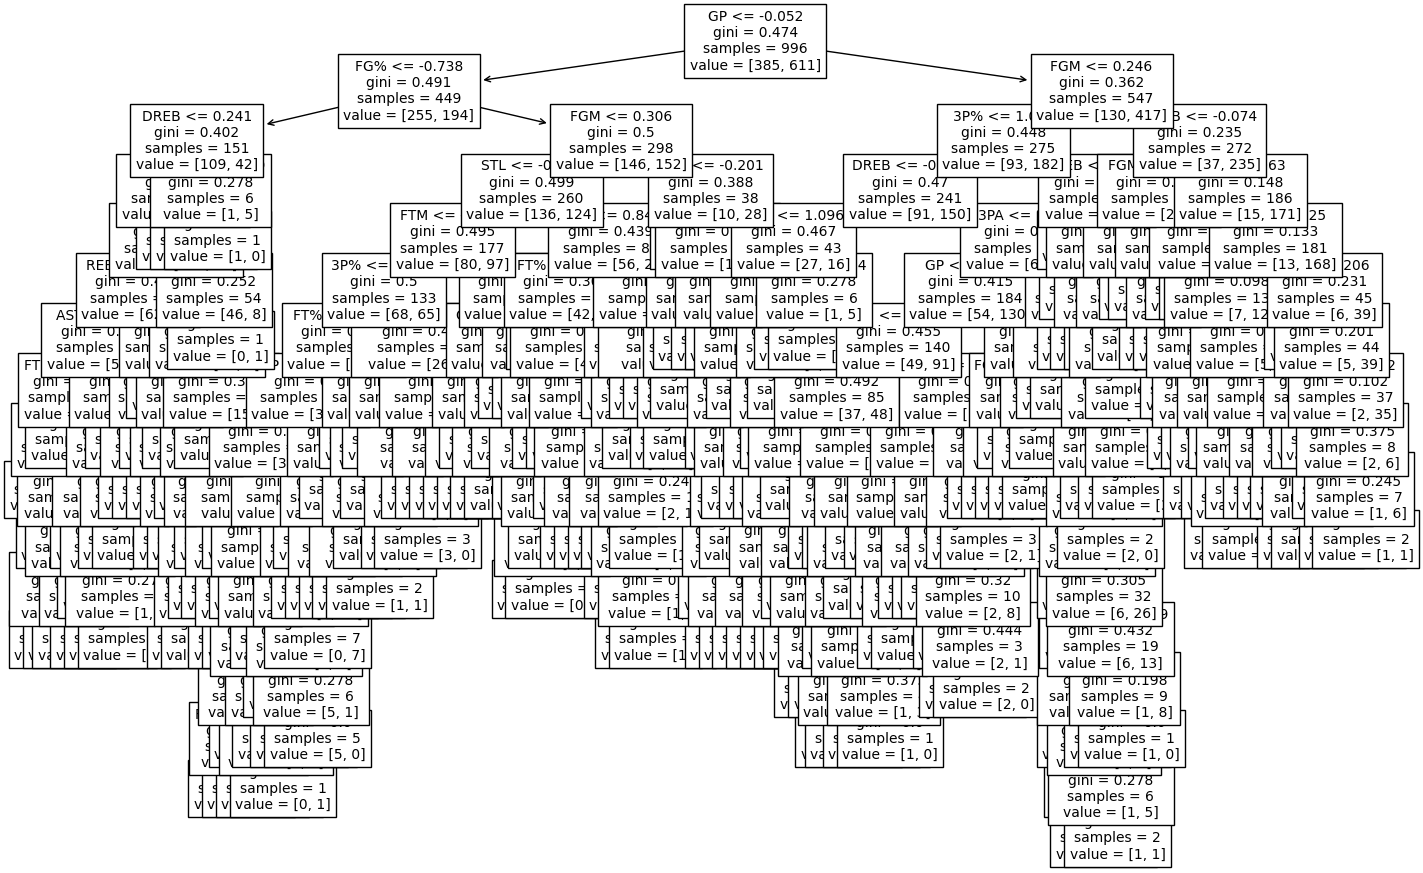

In [14]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Première ligne -0.052: si FG% <= -0.737: si DREB<= 0.241 ... (les données ont été standardisée via un StandardScaler)

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

- optimiser les hyperparamètres (Changer le critérion de base "gini" pour "entropy")
- "Pruner" l'arbre
- Utiliser des données et des caractéristiques significatives
- Utiliser une randomForest

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [15]:
# using random forest
clf_opti = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30],
              'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(clf_opti, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

estimate_b = best_clf.predict(X_test)
accuracy = best_clf.score(X_test, y_test)
print(f'accuracy: {accuracy}')

y_pred_opti = best_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_opti))


Best parameters: {'max_depth': 30, 'min_samples_leaf': 3, 'n_estimators': 100}
Best score: 0.6787236180904522
accuracy: 0.7327327327327328
              precision    recall  f1-score   support

         0.0       0.63      0.60      0.61       118
         1.0       0.79      0.80      0.80       215

    accuracy                           0.73       333
   macro avg       0.71      0.70      0.71       333
weighted avg       0.73      0.73      0.73       333



#### Question 2.8: Concluez

In [16]:
clf = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7207207207207207
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60       118
         1.0       0.78      0.79      0.78       215

    accuracy                           0.72       333
   macro avg       0.69      0.69      0.69       333
weighted avg       0.72      0.72      0.72       333



En conclusion, un modèle de neural network fait aussi le job.